In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('traffic-crashes.csv')
data.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# checking null values
sorted_na = data.isna().sum()/data.shape[0]
to_drop = sorted_na[sorted_na>0.6].sort_values(ascending=False).index
data.drop(to_drop, inplace=True, axis=1)

In [5]:
#inputing missing values with the mode

for i in data.isna().sum()[data.isna().sum()>0].index:
    data[i]=data[i].fillna(0)

In [6]:
to_drop

Index(['WORKERS_PRESENT_I', 'DOORING_I', 'WORK_ZONE_TYPE', 'WORK_ZONE_I',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'NOT_RIGHT_OF_WAY_I',
       'CRASH_DATE_EST_I', 'INTERSECTION_RELATED_I', 'LANE_CNT',
       'HIT_AND_RUN_I'],
      dtype='object')

In [7]:
data.nunique()

CRASH_RECORD_ID                  794956
CRASH_DATE                       521033
POSTED_SPEED_LIMIT                   45
TRAFFIC_CONTROL_DEVICE               19
DEVICE_CONDITION                      8
WEATHER_CONDITION                    12
LIGHTING_CONDITION                    6
FIRST_CRASH_TYPE                     18
TRAFFICWAY_TYPE                      20
ALIGNMENT                             6
ROADWAY_SURFACE_COND                  7
ROAD_DEFECT                           7
REPORT_TYPE                           4
CRASH_TYPE                            2
DAMAGE                                3
DATE_POLICE_NOTIFIED             603015
PRIM_CONTRIBUTORY_CAUSE              40
SEC_CONTRIBUTORY_CAUSE               40
STREET_NO                         11694
STREET_DIRECTION                      5
STREET_NAME                        1633
BEAT_OF_OCCURRENCE                  277
NUM_UNITS                            17
MOST_SEVERE_INJURY                    6
INJURIES_TOTAL                       20


#### Dealing with variables
1. drop the id
1. drop location
1. bin lat and long into far east, east, central, west, and far west west etc.
1. figure out date later

In [8]:
to_drop = ['CRASH_RECORD_ID', 'LOCATION', 'CRASH_HOUR']
data.drop(to_drop, inplace=True, axis=1)

parsing date

In [9]:
data.CRASH_DATE = data.CRASH_DATE.apply(lambda x: pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p"))
data.DATE_POLICE_NOTIFIED = data.DATE_POLICE_NOTIFIED.apply(lambda x: pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p"))

In [10]:
# adding a column MINUTES TO NOTIFY and dropping the DATE NOTIFIED column

data['MUNITES_TO_NOTIFY'] = (data.DATE_POLICE_NOTIFIED - data.CRASH_DATE).apply(lambda x:x.seconds/60)
data.drop('DATE_POLICE_NOTIFIED', inplace=True, axis=1)

In [11]:
# function to assign the time of day using time as imput

import datetime
def get_TOD(time):
    if time < datetime.time(4):
        return 'Night'
    elif time < datetime.time(10):
        return 'Morning'
    elif time < datetime.time(15):
        return 'Noon'
    elif time < datetime.time(19):
        return 'Evening'
    else:
        return 'Night'

In [12]:
#creating a new columnn that contains the time of day of the crash
data['CRASH_TIME_OF_DAY'] = data.CRASH_DATE.apply(lambda x: get_TOD(x.time()))
#creating a new columnn that contains the month of the crash
data['CRASH_MONTH_NAME'] = data.CRASH_DATE.apply(lambda x : x.month_name())
#creating a new columnn that contains the day of the crash
data['CRASH_DAY_OF_WEEK_NAME'] = data.CRASH_DATE.apply(lambda x : x.day_name())

Converting column names to lowercase because I feel like I am yelling a lot XD

In [13]:
data.columns = [x for x in pd.Series([x for x in data.columns]).apply(lambda x : x.lower())]

In [14]:
data['injury_flag'] = data.injuries_total.apply(lambda x : 0 if x<1 else 1)
data['death_flag'] = data.injuries_fatal.apply(lambda x : 0 if x<1 else 1)
data['injured'] = data.injuries_total
data['deaths'] = data.injuries_fatal

binning latitudes and longitudes

In [15]:
data['latitude_group'] = pd.qcut(data.latitude, q=5,labels=['Far South', 'South', 'Central', 'North', 'Far North'])
data['longitude_group'] = pd.qcut(data.longitude, q=5,labels=['Far West', 'West', 'Central', 'East', 'Far East'])

because of the high degree of correlation we will drop columns related to injuries

In [16]:
data.drop([x for x in data.columns if 'injuries' in x], axis=1, inplace=True)

In [17]:
data['day_number'] = (data.crash_date-data.crash_date.min()).apply(lambda x: x.days)

# Data Exploration

Count plots for nominal variables plotted to show how the target variable is split over categories

In [18]:
# Replacing values with <5% contribution with as 'Others'

cat_cols = [i for i in data.select_dtypes([object,'category']).columns]
cat_cols.remove('street_name')

for i in cat_cols:
    val_percentage = data[i].value_counts(normalize = True)*100
    to_replace = val_percentage[val_percentage<5].index.to_list()
    data[i] = data[i].replace(to_replace = to_replace, value ='Others')

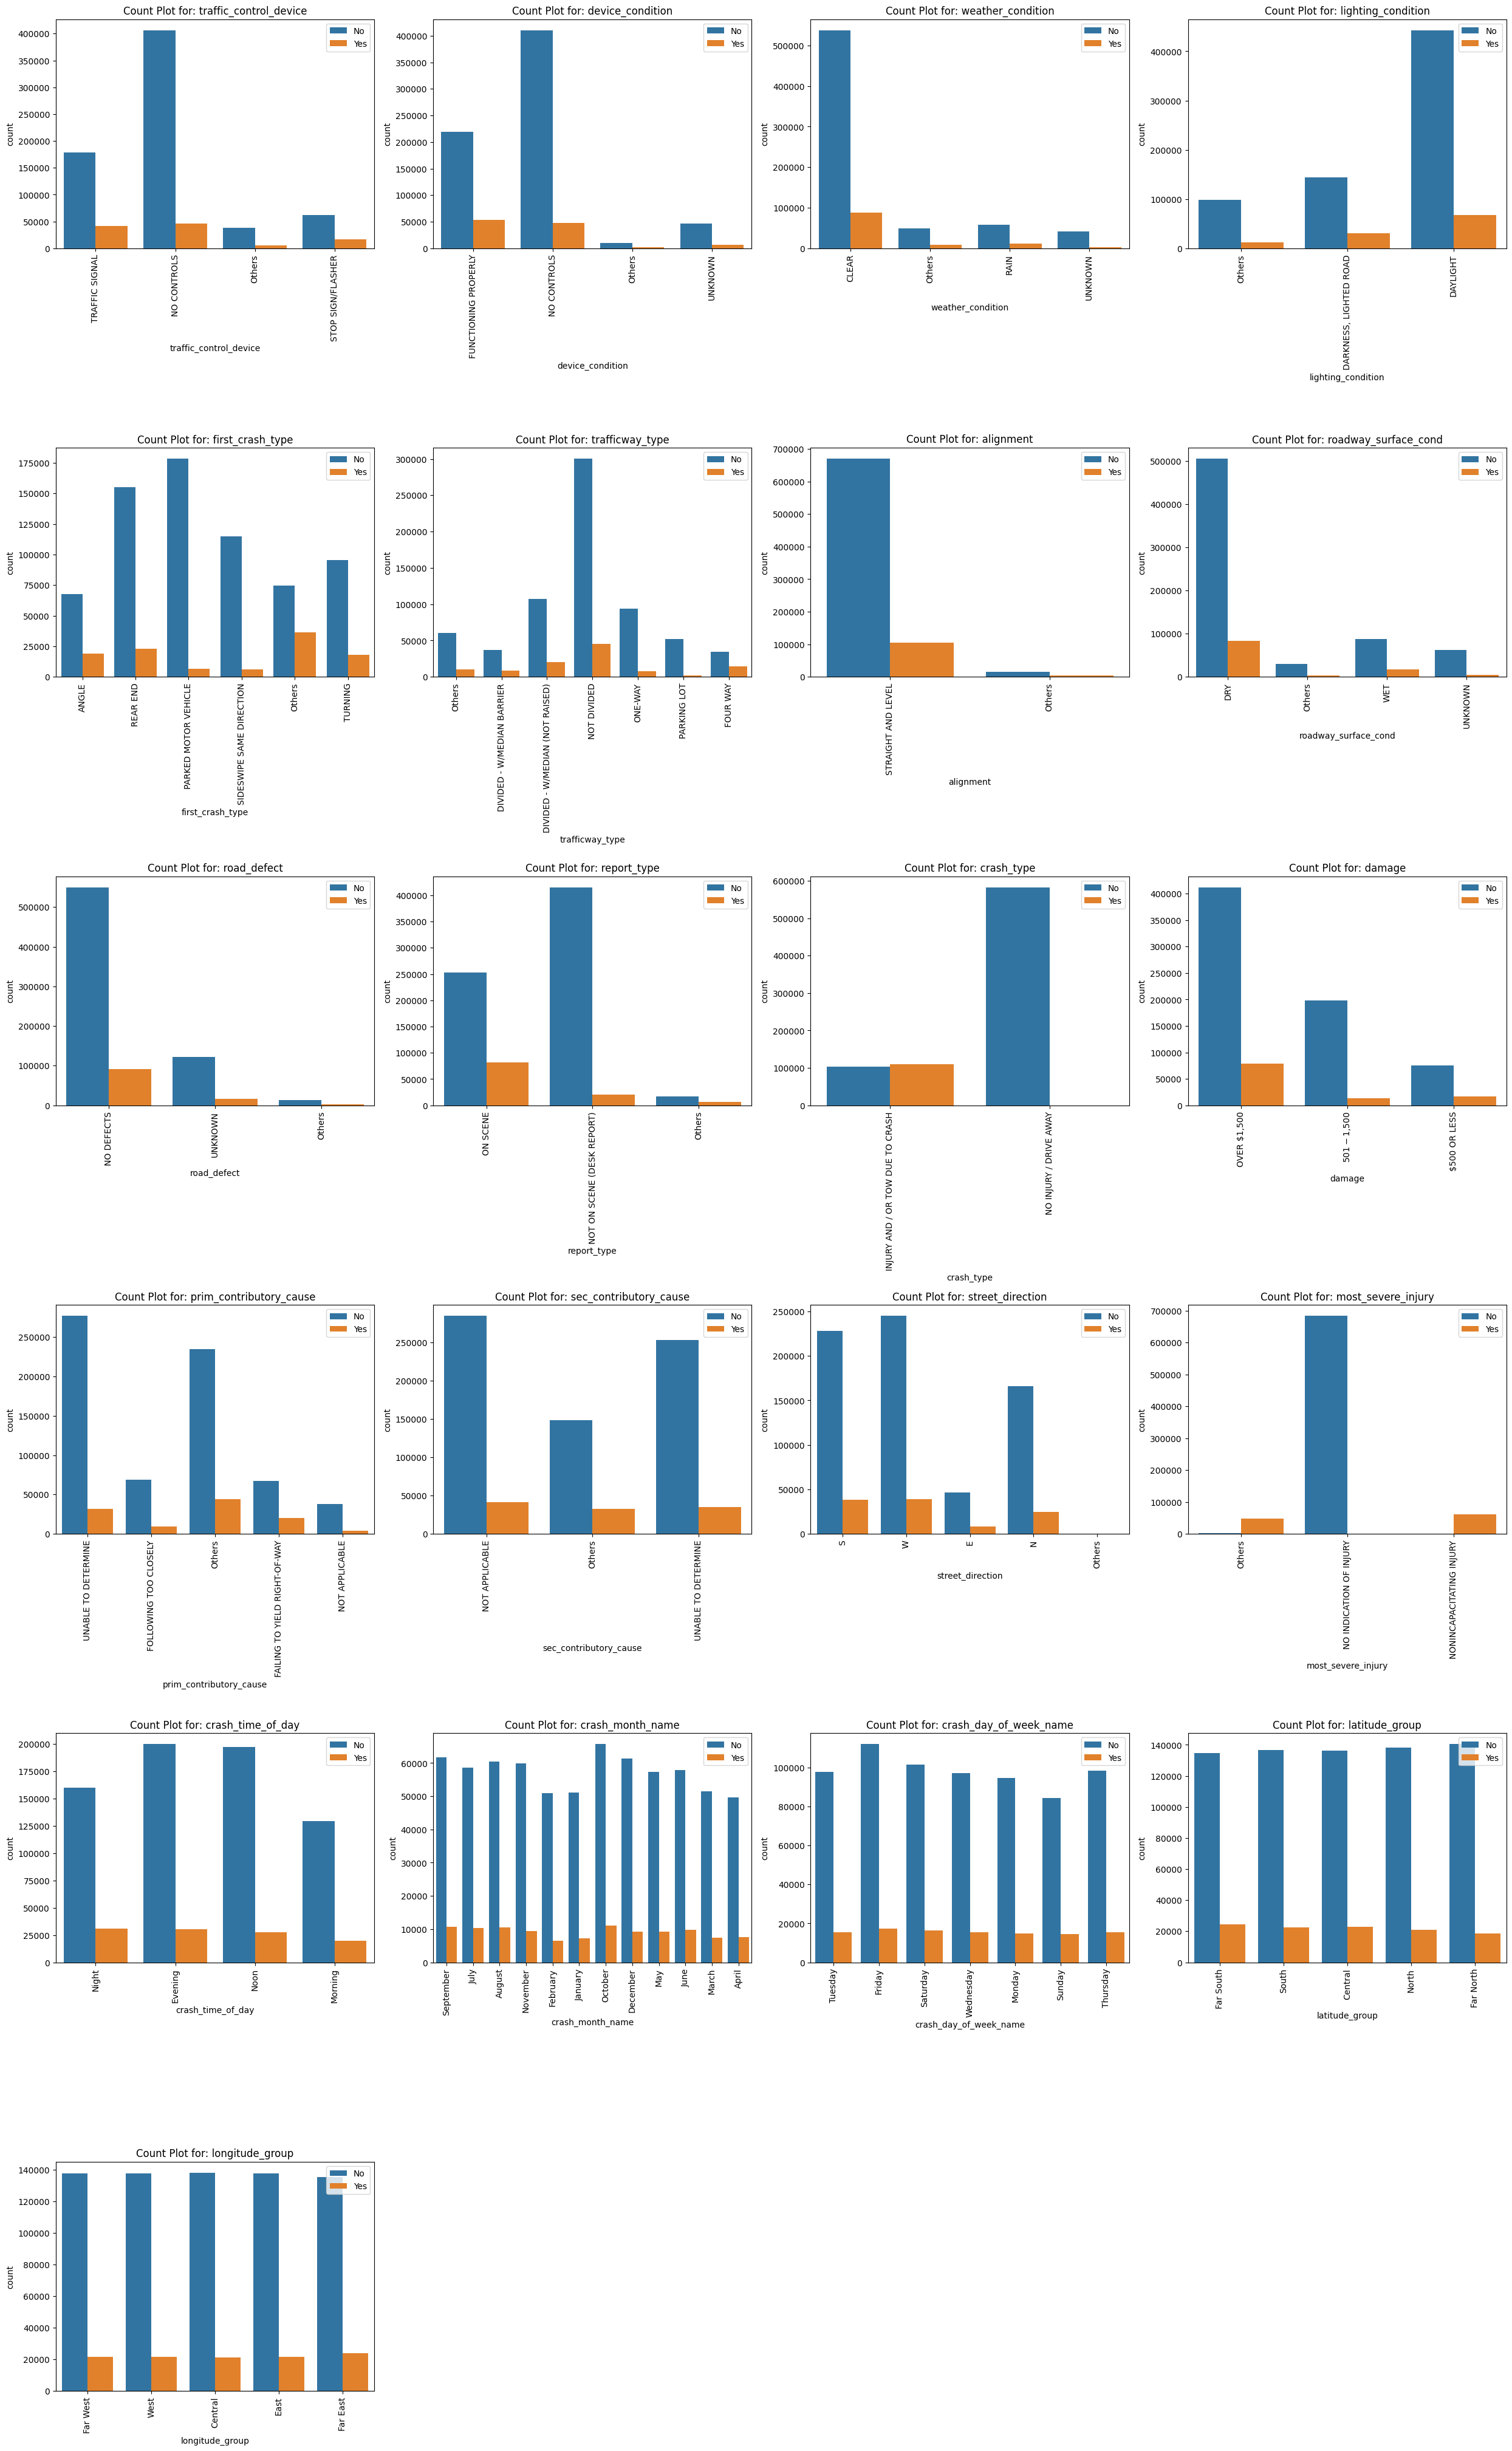

In [19]:

plt.figure(figsize=(25,40))
cnt = 1
for i in cat_cols:
    plt.subplot(int(np.ceil(len(cat_cols)/4)),4,cnt)
    sns.countplot(x=data[i], hue=data['injury_flag'])
    plt.tight_layout()
    plt.title('Count Plot for: '+i)
    plt.xticks(rotation = 90)
    plt.legend(['No', 'Yes'])
    cnt += 1

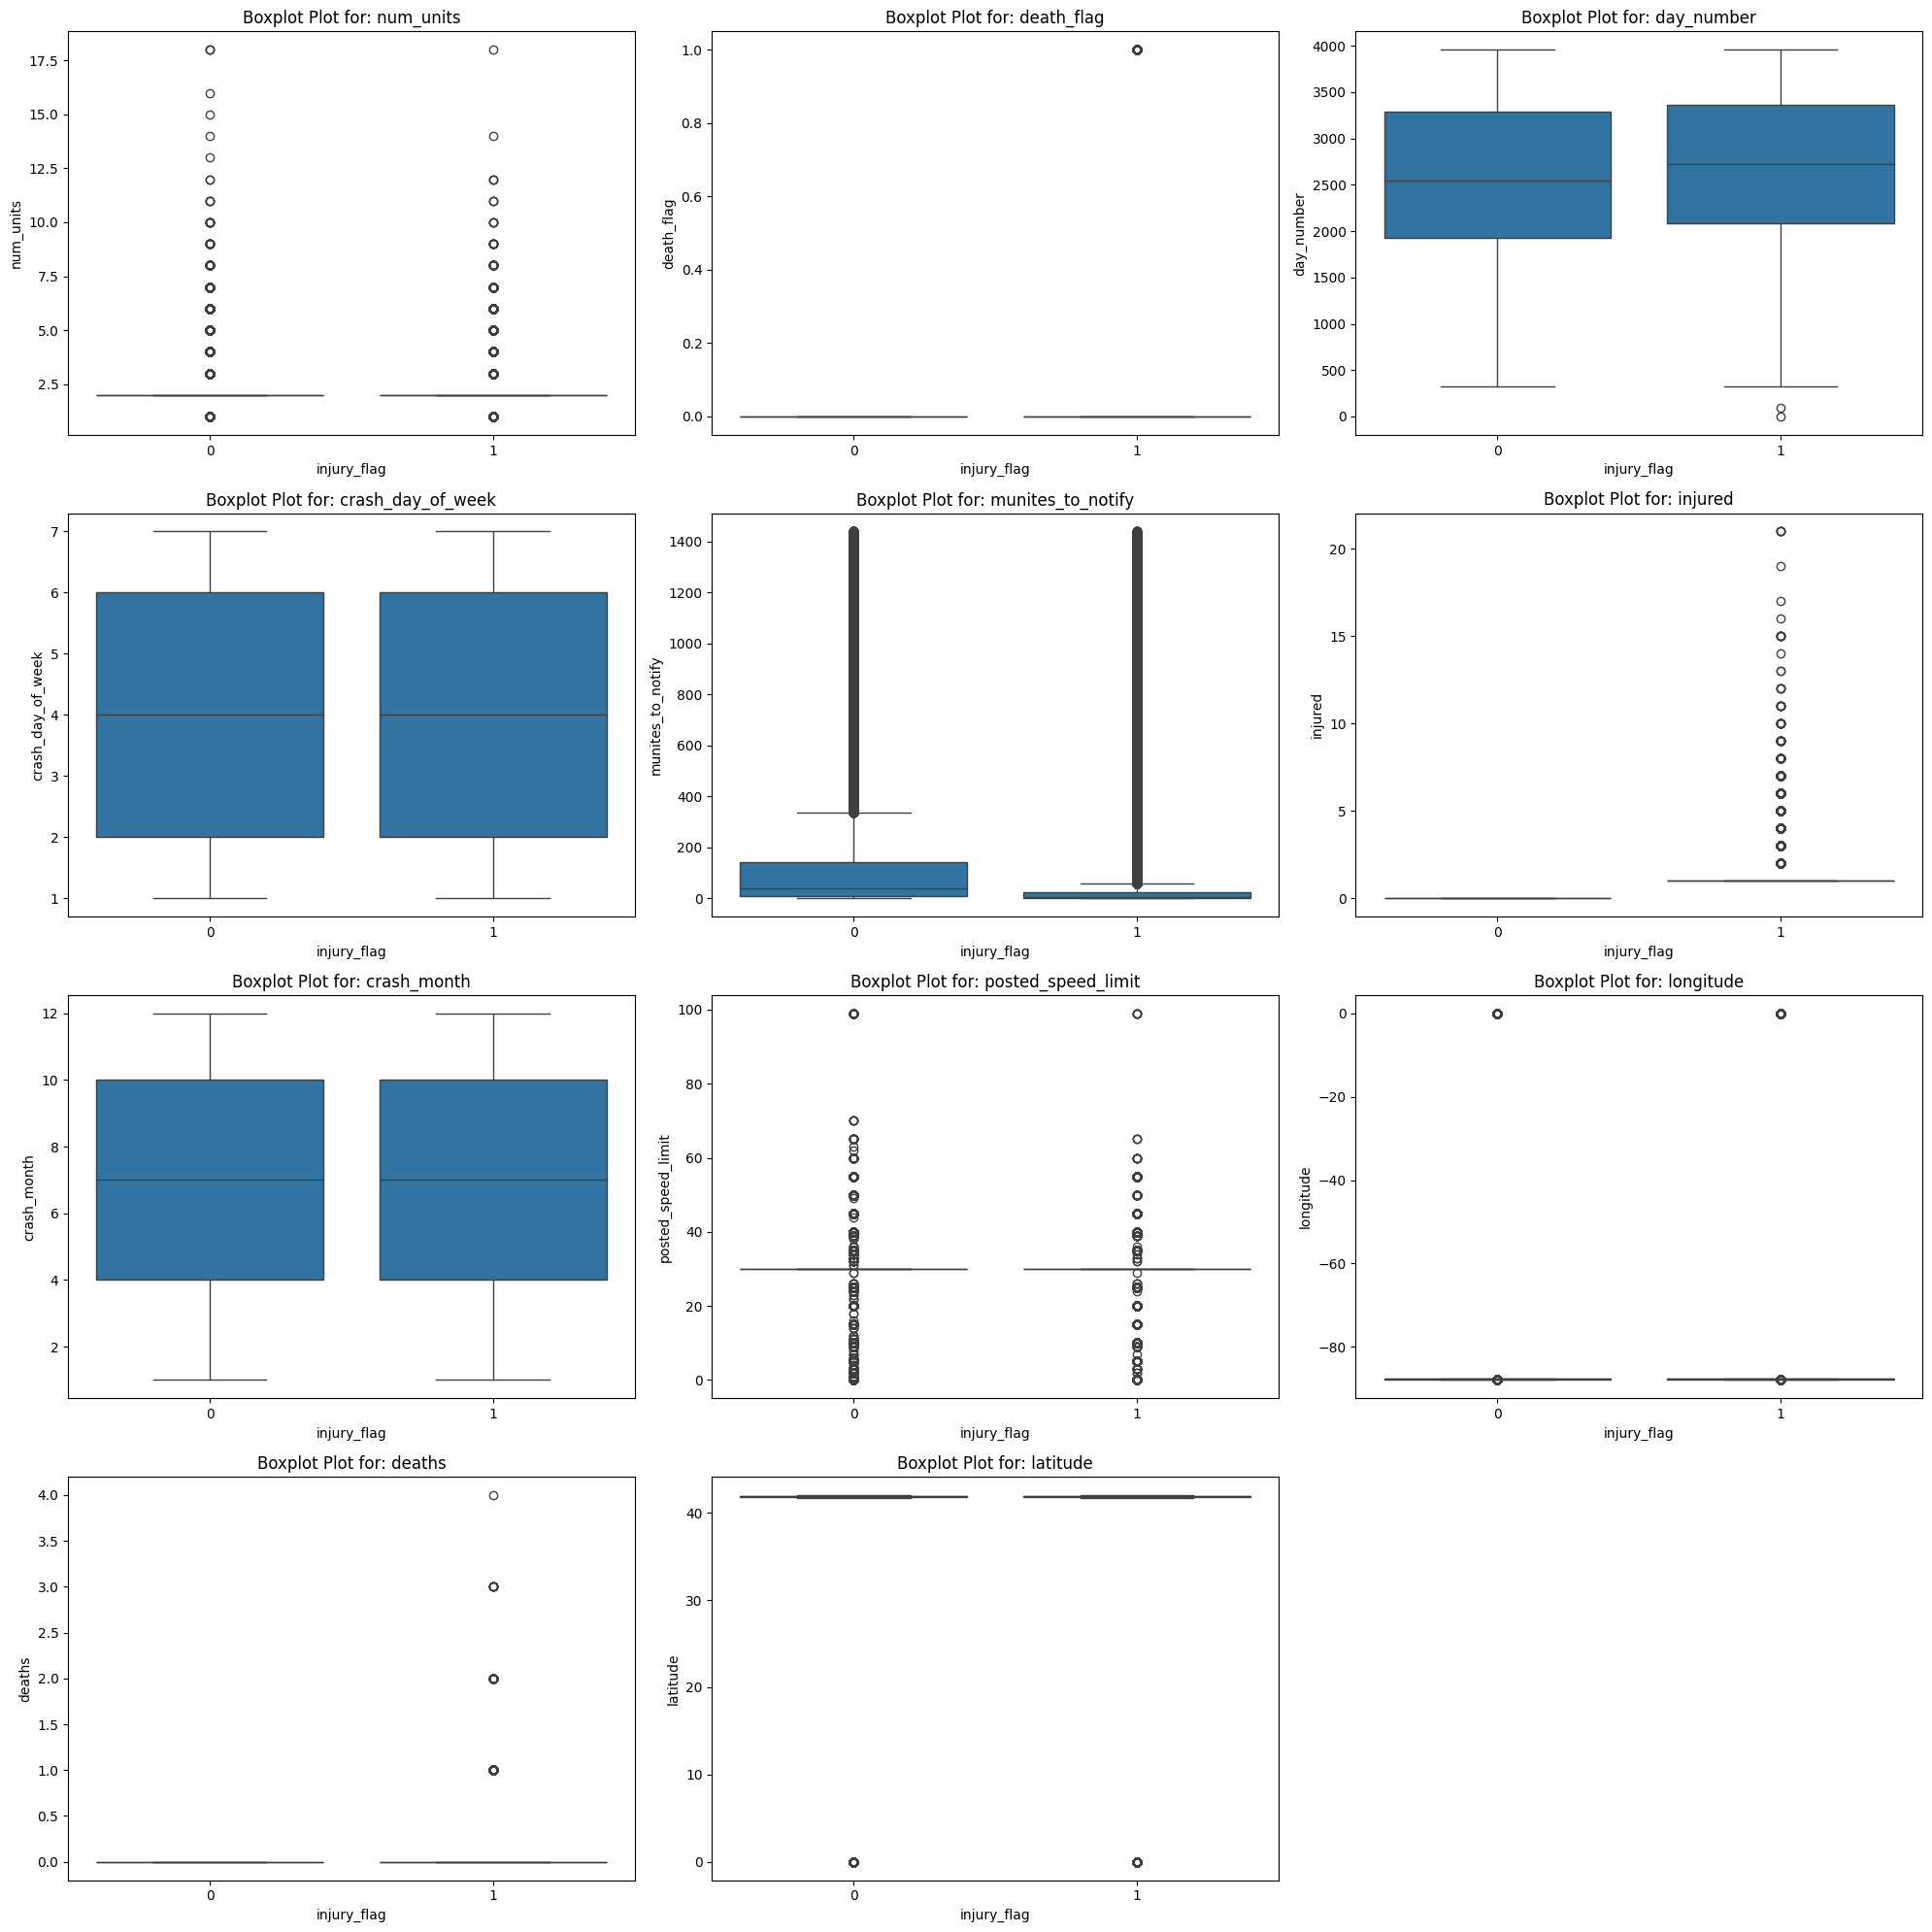

In [20]:
num_col = set(data.select_dtypes(np.number).columns)-{'beat_of_occurrence', 'injury_flag', 'street_no'}
cnt = 1
plt.figure(figsize=(20,20))
for i in num_col:
    plt.subplot(int(np.ceil(len(num_col)/3)),3,cnt)
    sns.boxplot(y=data[i],x=data.injury_flag)
    plt.tight_layout()
    plt.title('Boxplot Plot for: '+i)
    cnt += 1

# Pie Plots

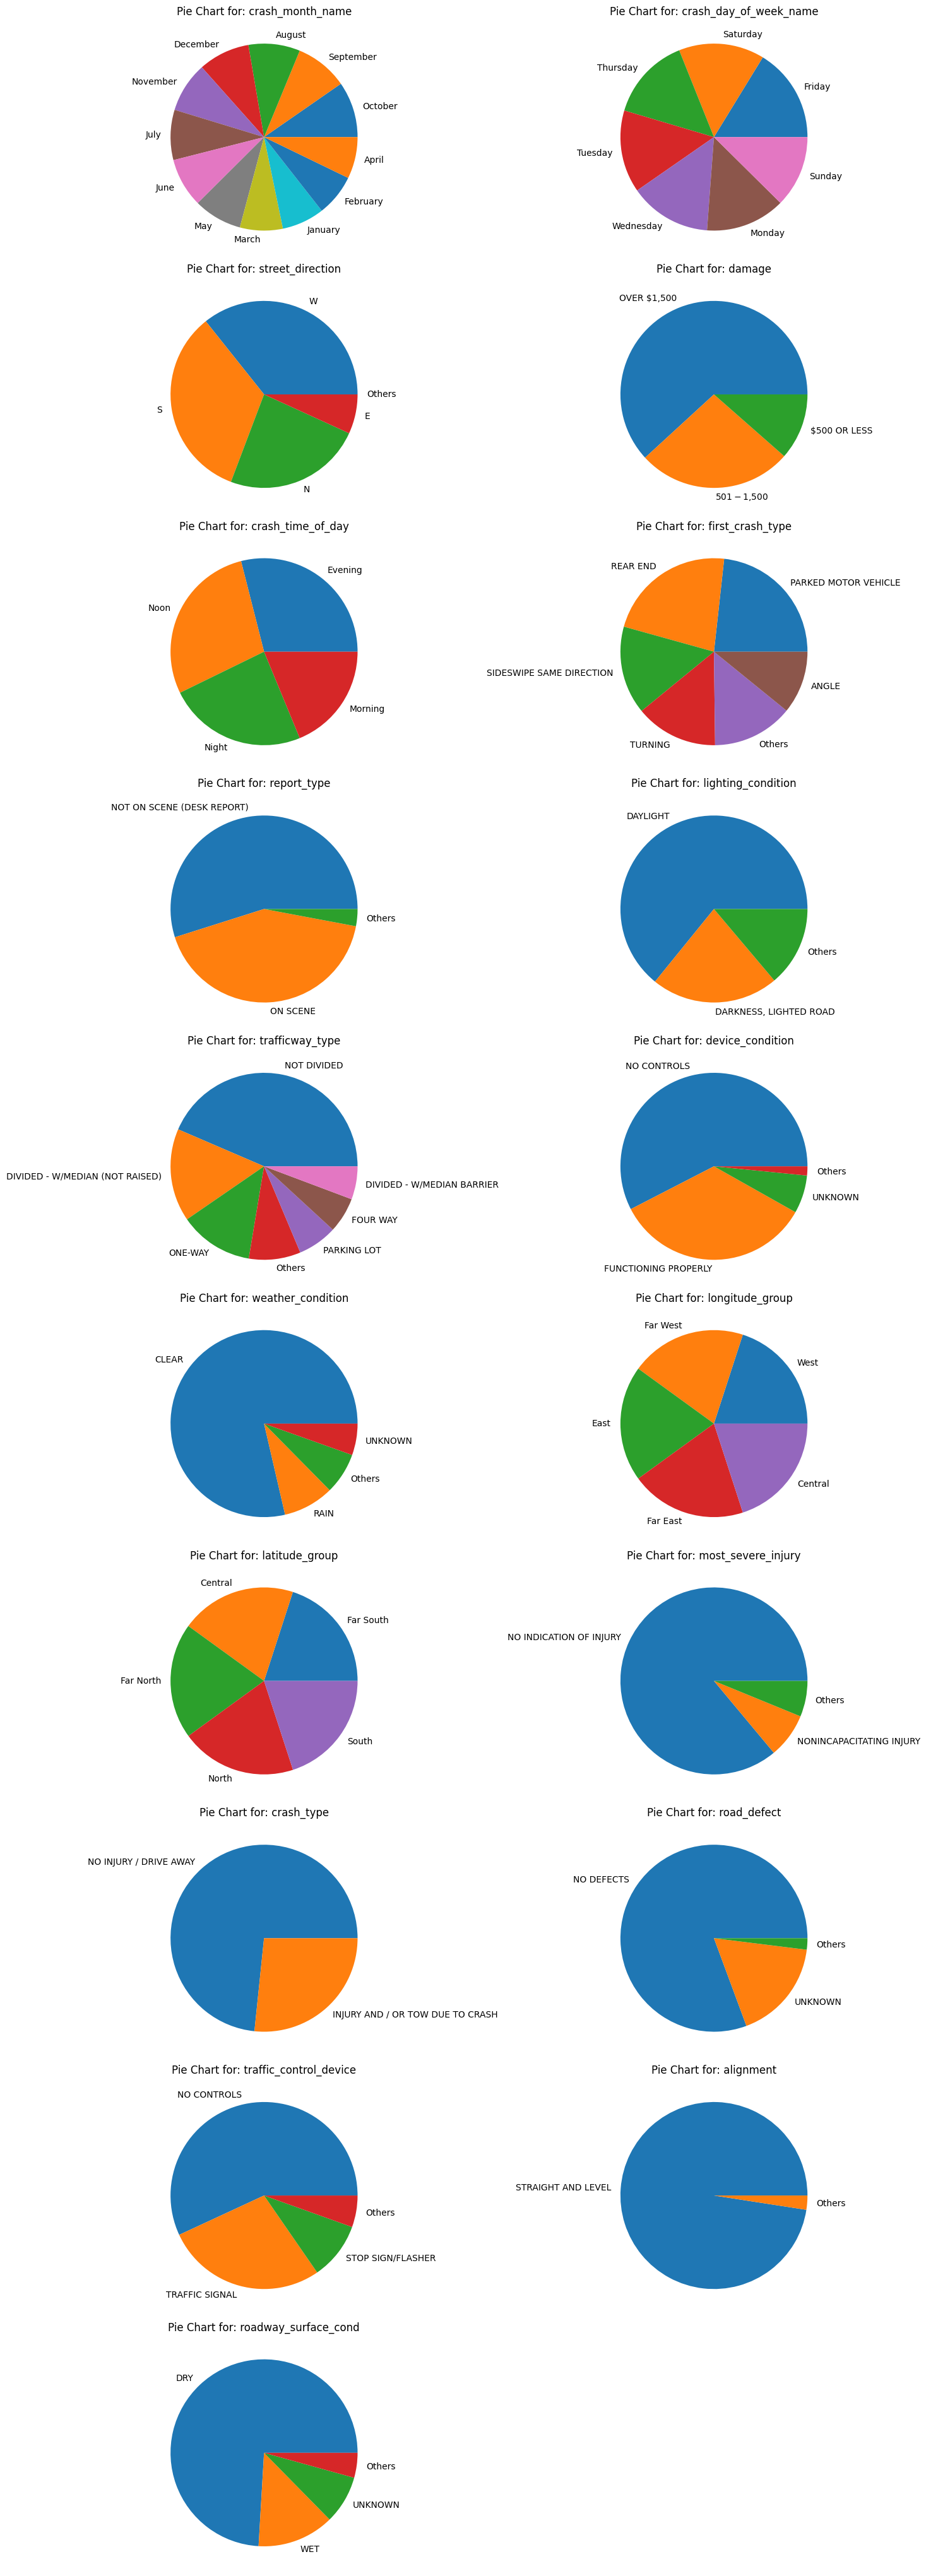

In [21]:
cnt = 1
plt.figure(figsize=(15,45))
for i in {i for i in cat_cols}-{'prim_contributory_cause', 'sec_contributory_cause'}:
    plt.subplot(int(np.ceil(len(cat_cols)/2)),2,cnt)
    data[i].value_counts(normalize=True).plot.pie()
    plt.tight_layout()
    plt.ylabel('')
    plt.title('Pie Chart for: '+i)
    plt.xticks(rotation = 90)
    cnt += 1

In [22]:
to_drop = ['crash_date', 'crash_month_name', 'crash_day_of_week_name','latitude_group', 'longitude_group', 'street_name']
data.drop(to_drop, axis=1, inplace=True)

In [23]:
cat_cols = data.select_dtypes(exclude=np.number).columns
data = pd.concat([data, pd.get_dummies(data[cat_cols], drop_first=True, dtype='int')],axis=1)
data.drop(cat_cols, axis=1, inplace=True)

In [24]:
data.head()

,posted_speed_limit,street_no,beat_of_occurrence,num_units,crash_day_of_week,crash_month,latitude,longitude,munites_to_notify,injury_flag,...,sec_contributory_cause_UNABLE TO DETERMINE,street_direction_N,street_direction_Others,street_direction_S,street_direction_W,most_severe_injury_NONINCAPACITATING INJURY,most_severe_injury_Others,crash_time_of_day_Morning,crash_time_of_day_Night,crash_time_of_day_Noon
0,30,5500,225.0,2,3,9,0.00000,0.000000,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,50,7900,411.0,2,6,9,0.00000,0.000000,5.0,0,...,0,0,0,1,0,0,0,0,0,0
2,30,2101,1235.0,4,7,7,41.85412,-87.665902,0.0,0,...,0,0,0,1,0,0,0,0,0,1
3,30,10020,1650.0,2,4,8,0.00000,0.000000,40.0,0,...,0,0,0,0,1,0,0,0,1,0
4,15,700,1654.0,2,6,8,0.00000,0.000000,5.0,1,...,0,0,0,0,1,1,0,0,0,1


#### Checking for correlations

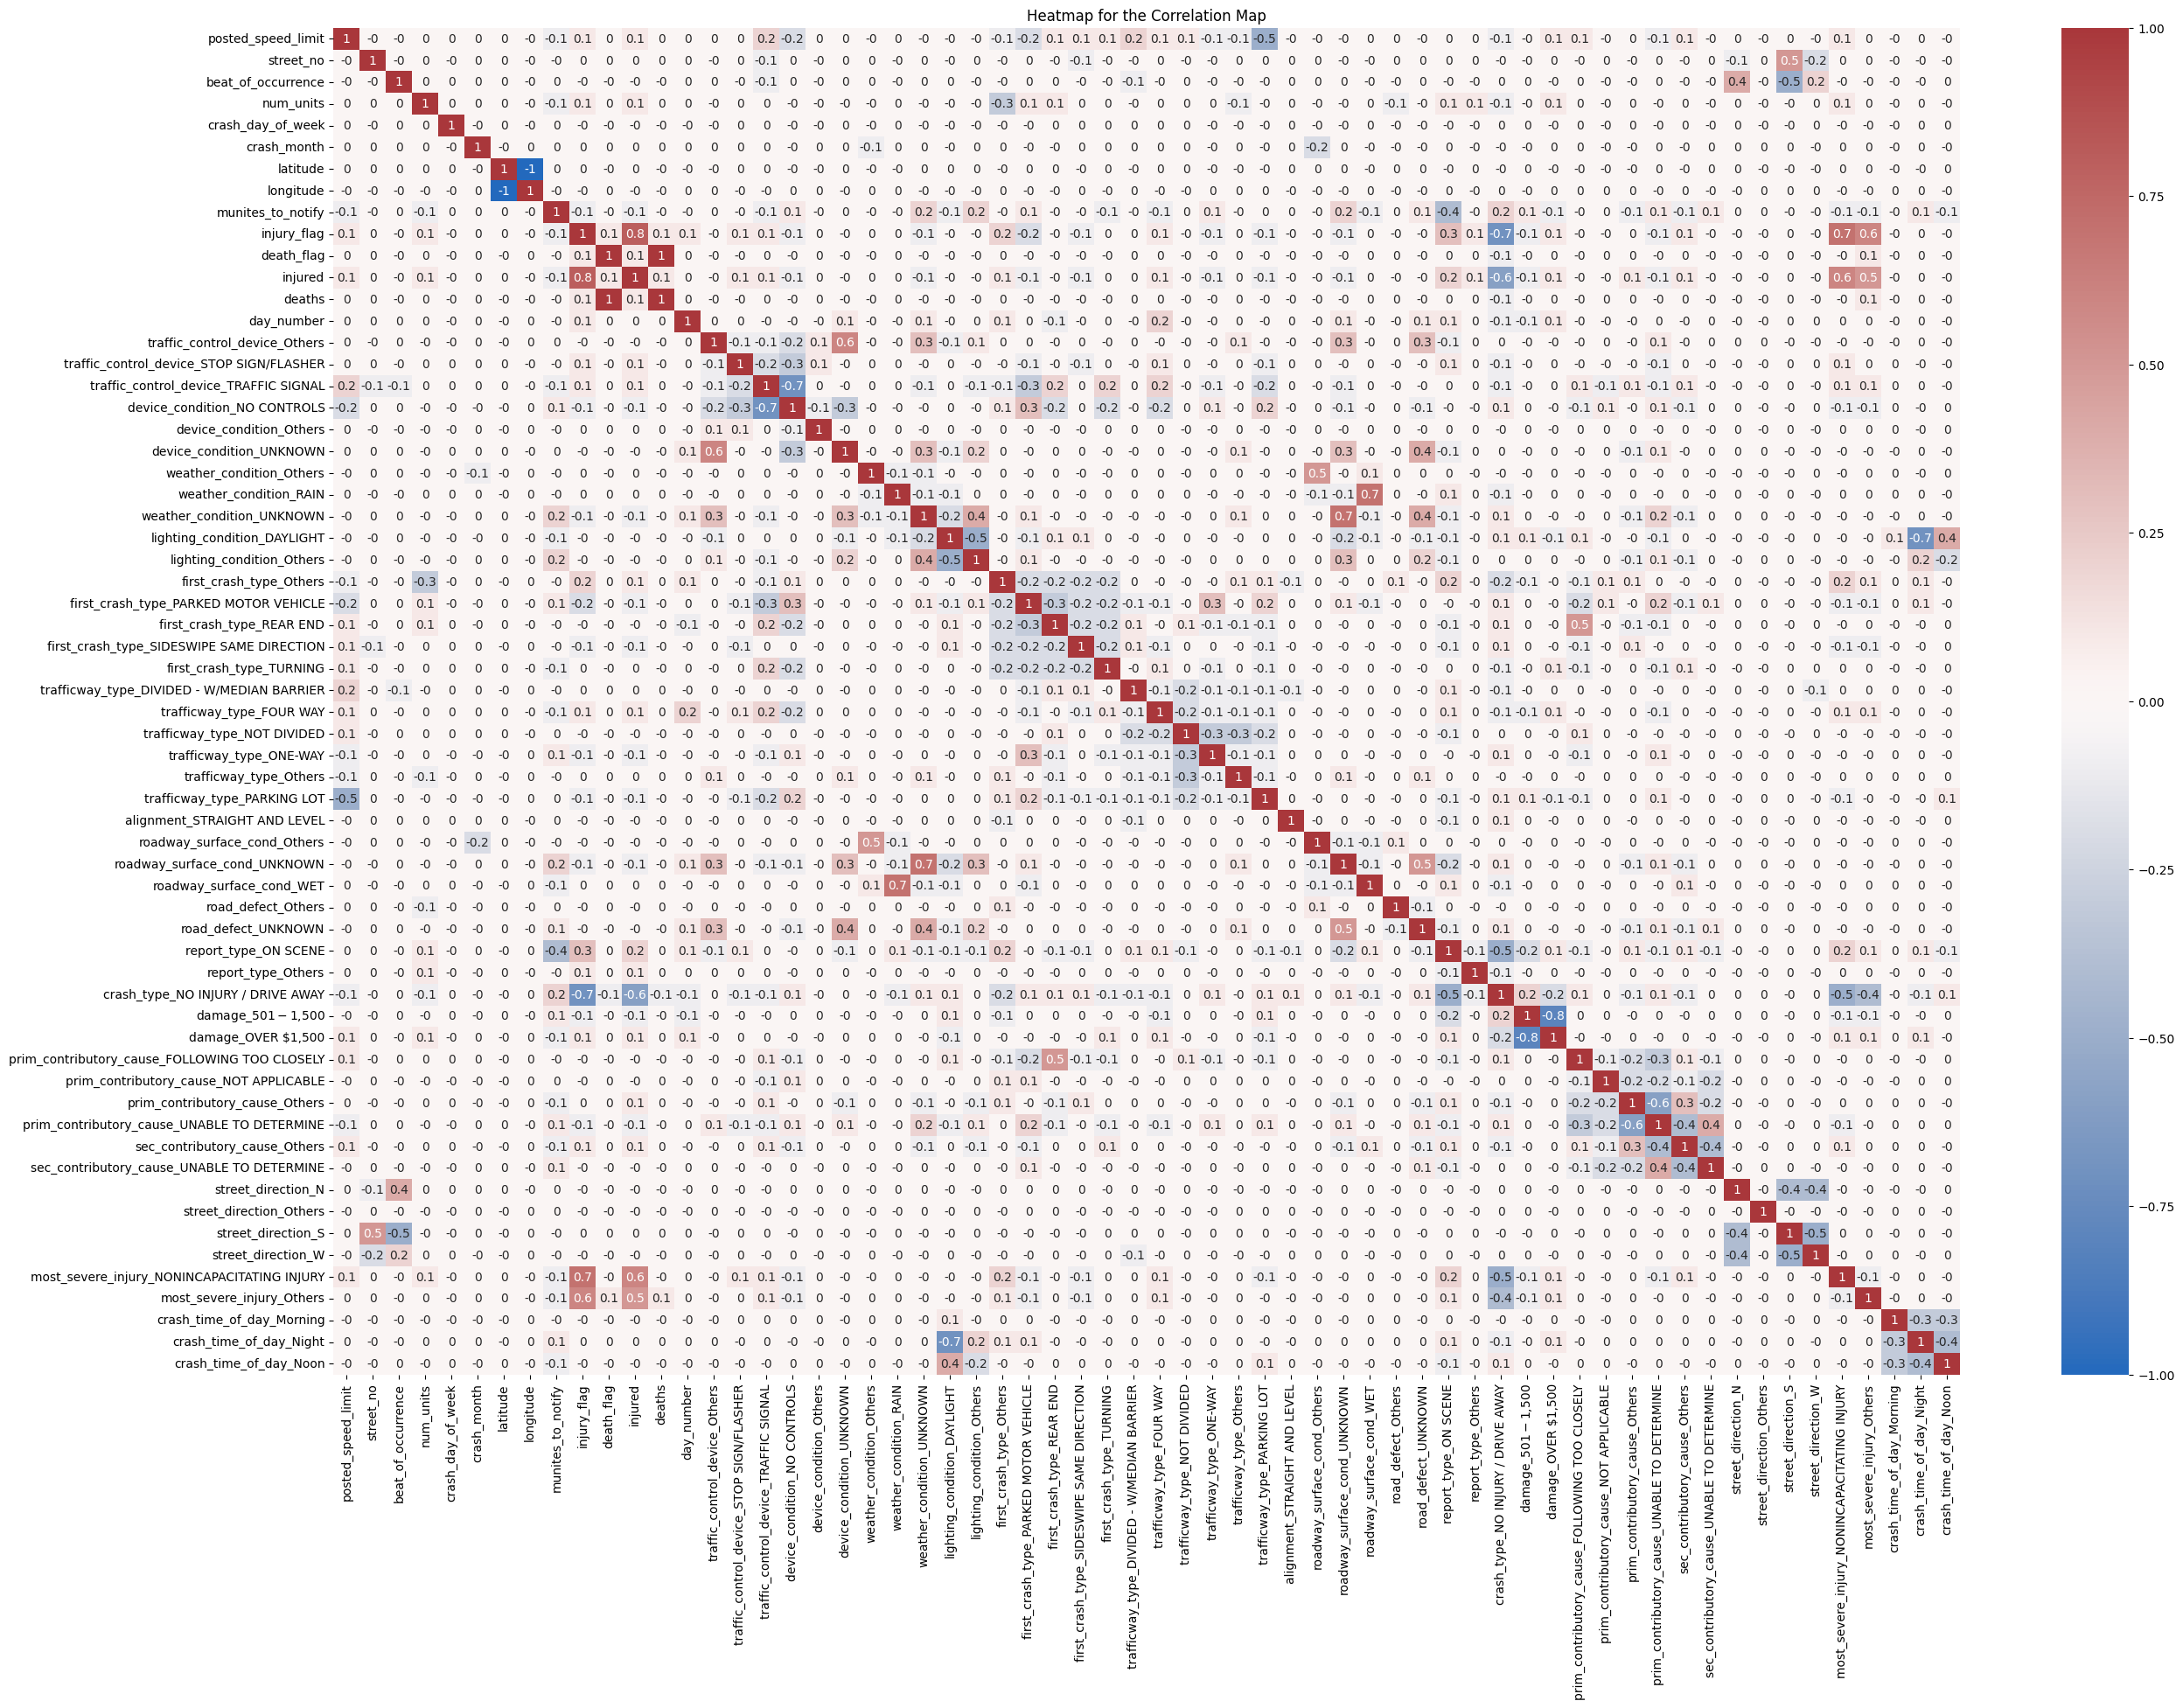

In [25]:
plt.figure(figsize=(30,20))
sns.heatmap(round(data.corr(), 1), annot=True, cmap='vlag')
plt.title('Heatmap for the Correlation Map')
plt.show()

In [26]:
to_drop = ['injured','most_severe_injury_NONINCAPACITATING INJURY', 'most_severe_injury_Others', 'death_flag']

data.drop(to_drop, axis=1, inplace=True)

## Scaling and Splitting

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


data_train, data_test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100, stratify=data.injury_flag)

y_train = data_train.pop('injury_flag')
X_train = data_train

In [28]:
scaler = MinMaxScaler()
categorical_cols = [i for i in X_train.select_dtypes(include='object').columns]
numeric_cols = [i for i in X_train.select_dtypes(include='number').columns]
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

In [29]:
# create a cross-validation scheme
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(20, 50, 10))}]


# specify model

model = LogisticRegression(random_state=100, max_iter=1000)
model.fit(X_train,y_train)
rfe = RFE(model)



model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy',
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)     

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LogisticRegression(max_iter=1000,
                                                        random_state=100)),
             param_grid=[{'n_features_to_select': [20, 30, 40]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [30]:
model_final = model_cv.best_estimator_
for x,y in zip(model_final.get_feature_names_out(),model_final.estimator_.coef_[0]):
    print(x,y)

posted_speed_limit 0.10915637705661253
beat_of_occurrence -0.37440875621351444
num_units 7.732842138182967
crash_month 0.07033010113629809
latitude 0.6962717943639036
longitude 0.6386674997563172
deaths 2.586455697709918
traffic_control_device_TRAFFIC SIGNAL 0.193861752496684
device_condition_NO CONTROLS -0.1539196203420722
device_condition_Others -0.09034060664913496
weather_condition_Others -0.08282577915245688
weather_condition_UNKNOWN -0.2916574346264082
lighting_condition_DAYLIGHT 0.24066195165025403
first_crash_type_Others 0.6706786492302845
first_crash_type_PARKED MOTOR VEHICLE -1.4311934482721904
first_crash_type_REAR END 0.35674768316032673
first_crash_type_SIDESWIPE SAME DIRECTION -0.35848342677004774
first_crash_type_TURNING -0.12320453799482631
trafficway_type_DIVIDED - W/MEDIAN BARRIER -0.14721699194307328
trafficway_type_FOUR WAY 0.09883615877610649
trafficway_type_ONE-WAY -0.1976293034591472
trafficway_type_Others -0.09035412687778682
alignment_STRAIGHT AND LEVEL 0.14571

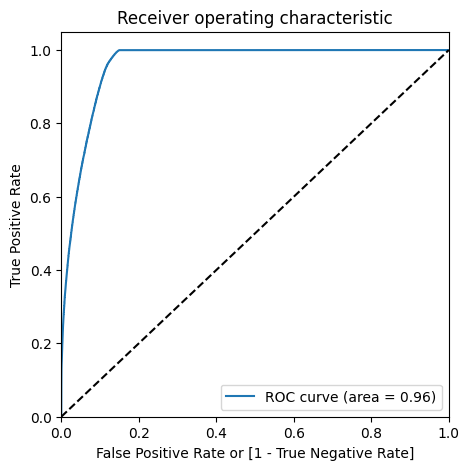

In [31]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_train, pd.DataFrame(model_final.predict_proba(X_train))[1])

## Prediction on the test set

In [32]:
y_test = data_test.pop('injury_flag')
X_test = data_test

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

y_test_pred = model_final.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_test_pred)

In [33]:
metrics.accuracy_score(y_test, y_test_pred)

0.9104773006495113

In [34]:
metrics.precision_score(y_test, y_test_pred)

0.677900397036296

In [35]:
metrics.recall_score(y_test, y_test_pred)

0.6624912162781461

In [36]:
metrics.f1_score(y_test, y_test_pred)

0.6701072344633642

In [37]:
metrics.balanced_accuracy_score(y_test, y_test_pred)

0.8062086711846221

# Results

In [38]:
coeffs = pd.Series(model_final.estimator_.coef_[0], model_final.get_feature_names_out())
coeffs.abs().sort_values(ascending=False)[:10]

crash_type_NO INJURY / DRIVE AWAY        12.460041
num_units                                 7.732842
deaths                                    2.586456
damage_OVER $1,500                        2.174592
damage_$501 - $1,500                      1.677479
first_crash_type_PARKED MOTOR VEHICLE     1.431193
report_type_ON SCENE                      0.757184
latitude                                  0.696272
first_crash_type_Others                   0.670679
longitude                                 0.638667
dtype: float64